#Proyecto: "Análisis de mercado inmobilario en Argentina"
##Autor: Ing.Victor Miguel Velazquez Espitia

##Resumen:
  Este proyecto presenta el estudio del dataset "Properati", este contiene informacion acerca de propiedades en Argentina. El proyecto esta dividido en tres partes; 1.-analisis de la problematica, 2.- Analisis exploratorio del dataset, 3.-Implemenacion de un modelo de Machine Learning para la prediccion de precios.

  

###Imporatación de librerias generales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt1

#Definir un metodo a utilizar
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

###Exportacion del dataset:

Al correr la siguiente linea, por favor seleccionar el dataset de properati. Para poder incorporarlo al notebook.

In [ ]:
from google.colab import files
data_to_load = files.upload()
import io
df = pd.read_csv(io.BytesIO(data_to_load['DS_Proyecto_01_Datos_Properati.csv']))
print(df.columns)
df.head()

Saving DS_Proyecto_01_Datos_Properati.csv to DS_Proyecto_01_Datos_Properati.csv
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#La problematica
##Deseamos implementar un metodo para valuar propiedades de acuerdo a las condiciones actuales del mercado. Contamos con un dataset de la informacion actual. Este proyecto esta centrado en propiedades familiares en la region de capital federal.

###Como podemos observar a continuacion este dataset cuenta con 19 propiedades.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

#Analisis exploratorio

Un primer punto muy importante es conocer si hay valores faltantes en el dataset.
Para esto utilizaremos el metodo creado al principio del notebook

In [ ]:
missing_values_table(df)

Your selected dataframe has 19 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
surface_covered,21614,14.7
surface_total,20527,14.0
lon,9959,6.8
lat,9925,6.8
bathrooms,5957,4.1


Como nos muestra la tabla, 5 de las columnas cuentan con valores faltantes, de aqui podemos hacer una primera observacióón. Las variables correspondientes a la superficie, son las que tienen mayor porcentaje de valores faltantes. De 14%

¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset?
---------
Observemoslo en una tabla y un grafico

In [ ]:
##Tabla
sns.set_theme(style="darkgrid")
print('--------------')
count_types = df['property_type'].value_counts()
print(count_types)
len_types = len(count_types)
print('--------------')
print('Hay un total de: '+ str(len_types) +' tipos de propiedades')



--------------
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64
--------------
Hay un total de: 10 tipos de propiedades


Hay un total de: 146660 propiedades


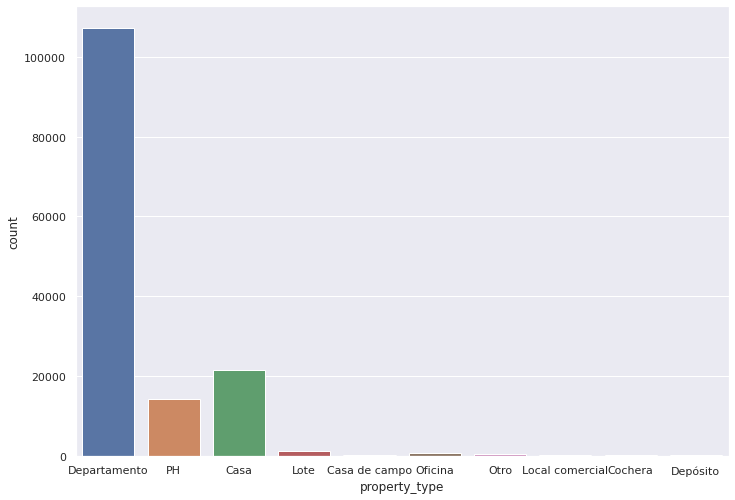

In [ ]:
##Grafico
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x='property_type', data=df)
prop_type_ser = df['property_type']
total = prop_type_ser.count()
print('Hay un total de: '+ str(total) + ' propiedades')

Como podemos observar en la grafica anterior el dataset esta altamente inbalanceado, ya que el tipo de propiedad Departamento, PH y casa son la mayoria de este, veamos las proporciones:

In [ ]:
importants = prop_type_ser.value_counts()
importants_c = importants[importants>1500]
nonimportant_total = pd.Series({'Otros':total-importants_c.sum()})
print(nonimportant_total)
importants_c = importants_c.append(nonimportant_total, ignore_index=False)
importants_c

Otros    3515
dtype: int64


Departamento    107326
Casa             21521
PH               14298
Otros             3515
dtype: int64

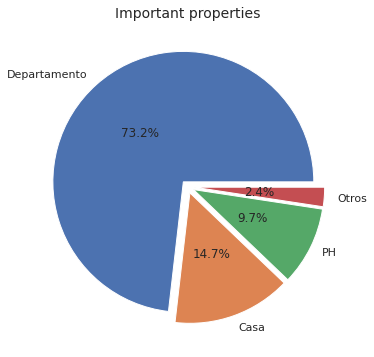

In [ ]:
pie, ax = plt1.subplots(figsize=[10,6])
labels = importants_c.keys()
plt1.pie(x=importants_c, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt1.title("Important properties", fontsize=14);
pie.savefig("DeliveryPieChart.png")

En la grafica anterior podemos ver como entre los primeros tres tipos mas importantes son el 97.6% de todo el dataset. Debido a esto nos enfocaremos solo en ellos, sin embargo estudiemos un poco las proporciones de los "otros":

7


Lote               1312
Oficina             658
Otro                374
Local comercial     325
Casa de campo       322
Depósito            265
Cochera             259
Name: property_type, dtype: int64

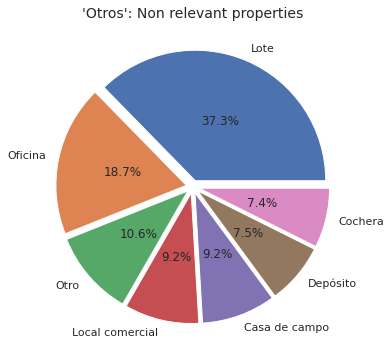

In [ ]:
nonimportants = importants[importants<1500]
n_ =len(nonimportants)
print(n_)
pie, ax = plt1.subplots(figsize=[10,6])
labels = nonimportants.keys()
plt1.pie(x=nonimportants, autopct="%.1f%%", explode=[0.05]*n_, labels=labels, pctdistance=0.5)
plt1.title("'Otros': Non relevant properties", fontsize=14);
nonimportants

Lote, es un tipo de propiedad que cuenta con 1312 casos, la cantidad podria ser suficiente para considerarla, pero queda fuera del alcance de este proyecto ya que, unicamente nos enfocaremos en propiedades habitacionales de ciudad. Ya que trabajamos sobre la capital federal.

Sobre lo ultimo veamos la cantidad de propiedades por region.

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

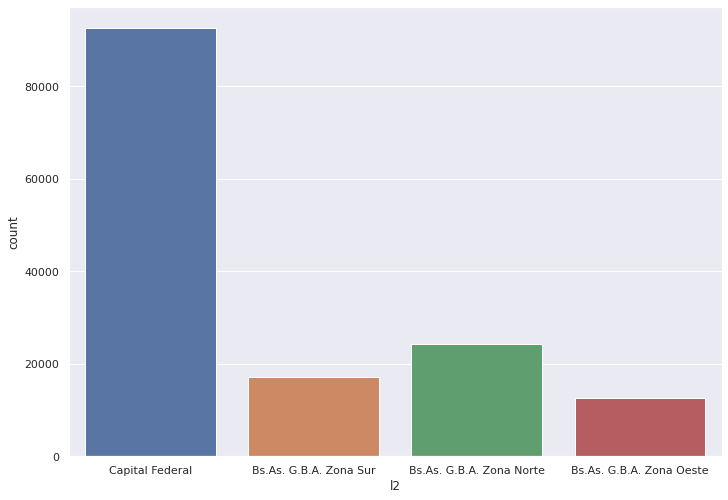

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x='l2', data=df)
df['l2'].value_counts()

De lo ultimo podemos observar claramente como capital federal es la region con mas propiedades. Y nuestra variable de interes.

##Con el analisis exploratorio anterior podemos proseguir a filtrar el dataset para quedarnos unicamente con las propiedades y valores que nos interesan:

El primer paso, es quedarnos unicamente con las 3 propiedades de interes y que sean de la Capital federal

In [ ]:
df2=df[(df['property_type'].isin(['Departamento','Casa','PH']) & (df.l2 == 'Capital Federal'))]
print(df2.shape)
df2.head()

(91485, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


##Cuales son los barrios mas caros de capital federal?

In [ ]:
df2['l2'].value_counts()

Capital Federal    91485
Name: l2, dtype: int64

Al grafico siguiente porfavor dar click para vizualizar mas claramente.

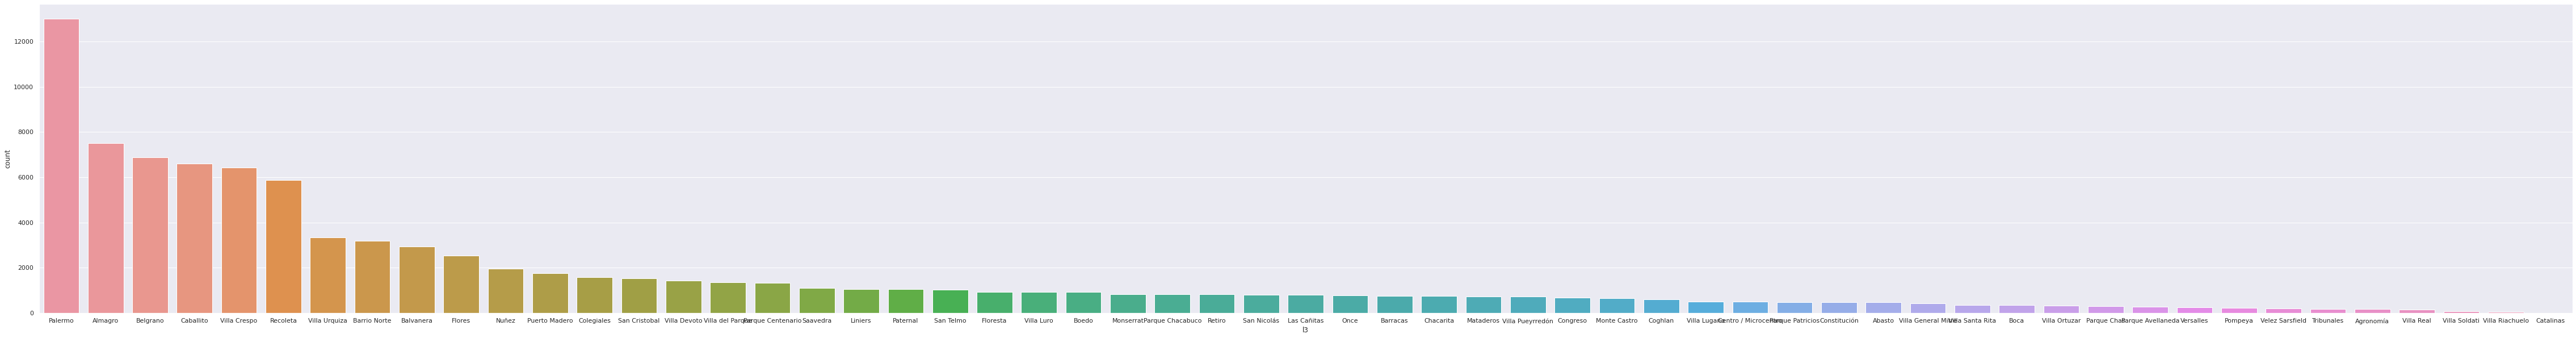

In [ ]:
a4_dims = (80, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x='l3', data=df2, order= df2['l3'].value_counts().index)
l3_ = df['l3']

##Del grafico anterior vemos una clara diferencia apartir de Recoleta como el 6to barrio mas caro en adelante, bajando los precios por mas de la mitad, a su siguiente barrio "Vila urquiza"

Corroboramos que todas las propiedades esten en la misma moneda, de otro modo seria necesario normalizar

In [ ]:
count_types = df2['currency'].value_counts()
print(count_types)
print(df2.shape)

USD    91485
Name: currency, dtype: int64
(91485, 19)


Ahora reduciremos el data set, a las variables numericas de interes, con las cuales calcularemos los valores de precio de propiedad

In [ ]:
df2 = df2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']]
df2=df2.dropna()
df2.shape

(81210, 7)

Una buena practica es imprimir algunos plots para ver las correlaciones antes y despues del filtrado extensivo

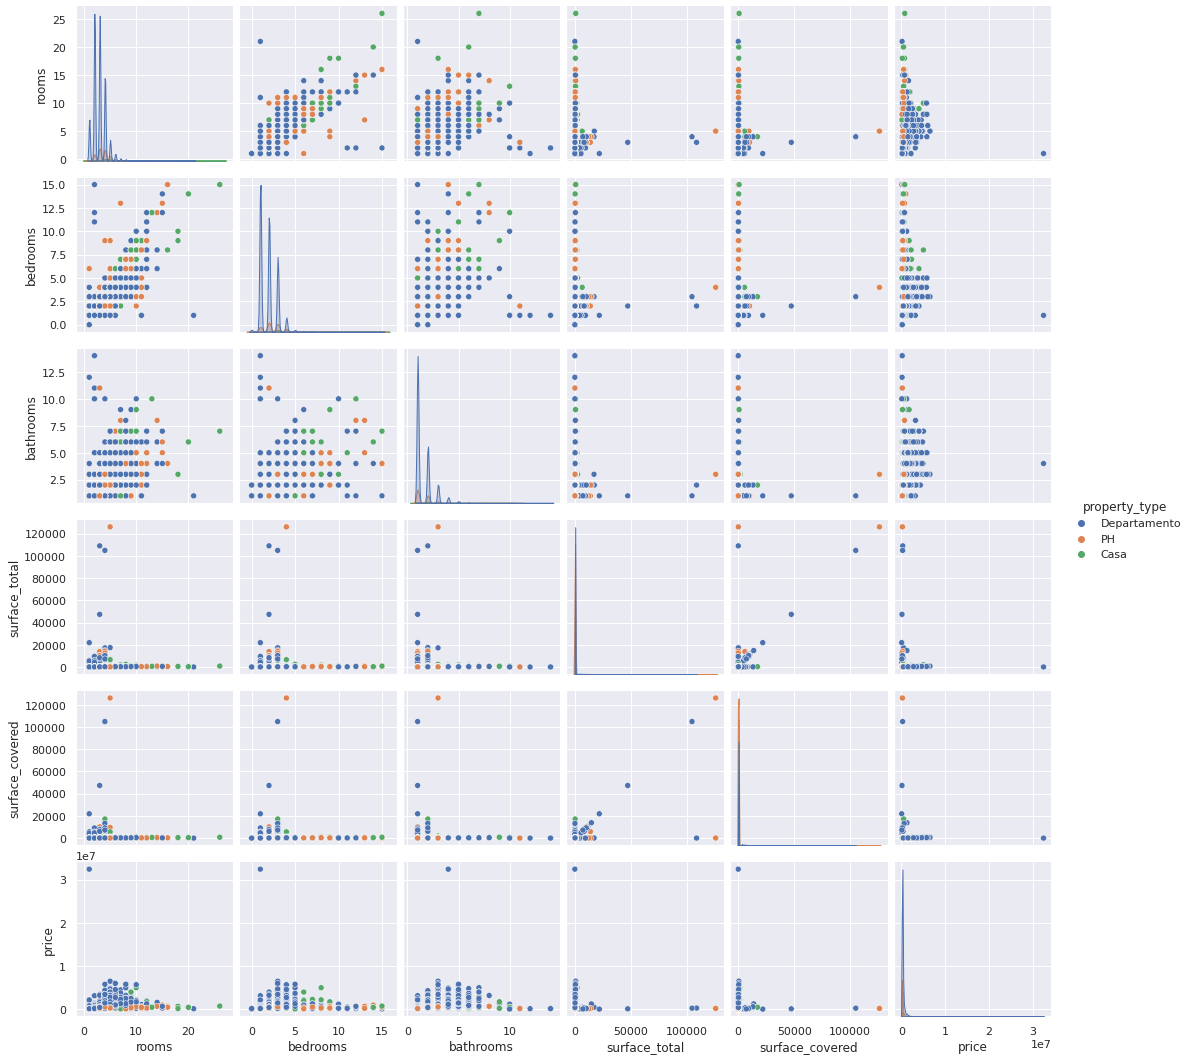

In [ ]:
sns.pairplot(df2, hue='property_type', vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'])


De este primer pairplot podemos ver algunos comportamientos extraños en varias graficas, como en las de precio, contra area, entre otros. eso se debe a valores atipicos. ahora procederemos a filtrar. Para esto es necesario evaluar las escalas y apartir de que rango podemos considerarlos atipicos.

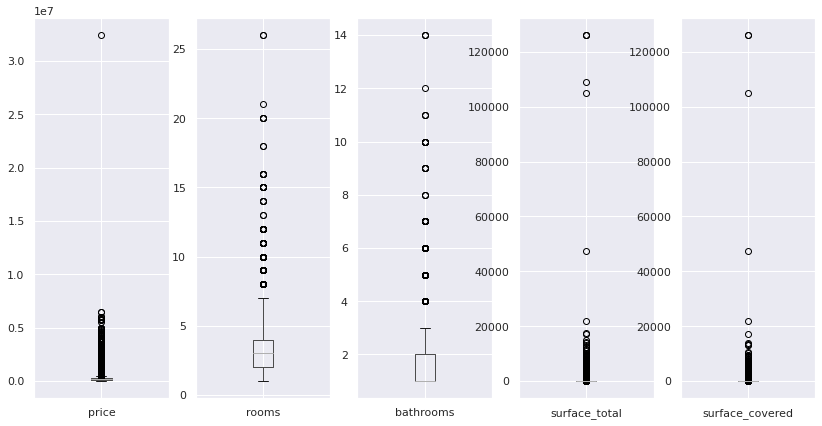

In [ ]:
plt1.figure(figsize = (14,7))
plt1.subplot(1,5,1)
df2.boxplot("price")

plt1.subplot(1,5,2)
df2.boxplot("rooms")

plt1.subplot(1,5,3)
df2.boxplot("bathrooms")

plt1.subplot(1,5,4)
df2.boxplot("surface_total")

plt1.subplot(1,5,5)
df2.boxplot("surface_covered")

De la table anterior podemos apreciar los rangos de cada una de las variables numericas de interes a filtrar. Iterativamente se resolvio buscando un filtrado correcto para estas. Resultando en lo siguiente:

In [ ]:
df2 = df2[(df2.surface_total>15) & (df.surface_total<400)]
df2 = df2[df2.surface_covered<350]
df2 = df2.drop(df2[df2.surface_covered > df2.surface_total].index)
df2 = df2[df2.price<1500000]
df2=df2[(df2.rooms <10)]
df2=df2[(df2.bathrooms <6)]
df2.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


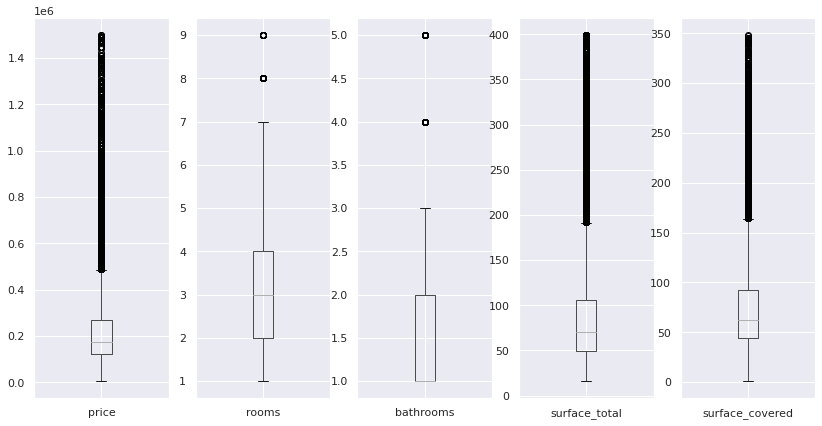

In [ ]:
plt1.figure(figsize = (14,7))
plt1.subplot(1,5,1)
df2.boxplot("price")

plt1.subplot(1,5,2)
df2.boxplot("rooms")

plt1.subplot(1,5,3)
df2.boxplot("bathrooms")

plt1.subplot(1,5,4)
df2.boxplot("surface_total")

plt1.subplot(1,5,5)
df2.boxplot("surface_covered")

Podemos ver el cambio de la configuracion de los datos en los box pots, en las variables las cajas era apenas apreciables. con este filtrado tenemos datos menos dispersos.

In [ ]:
df2.shape

(78351, 7)

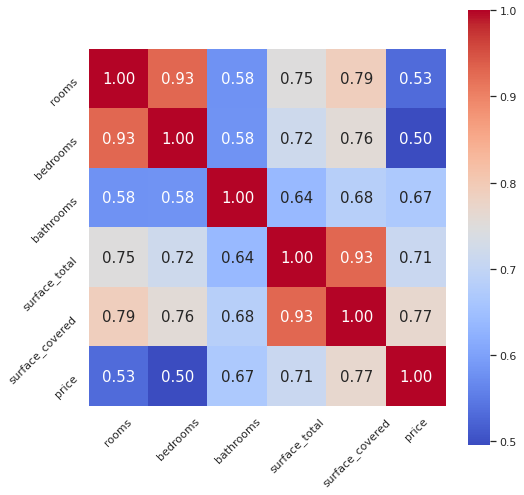

In [ ]:
corr=df2.corr()
plt1.figure(figsize=(8,8))
ax=sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt1.xticks(rotation = 45)
plt1.yticks(rotation = 45)
plt1.show()


Del heatmap anterior podemos ver varias cosas importantes y es la correlacion de las variables. Principalmente nos interesan la relacion de las variables con el precio. POdemos ver que la mas significativa es la superficie cubierta y la superficie total.

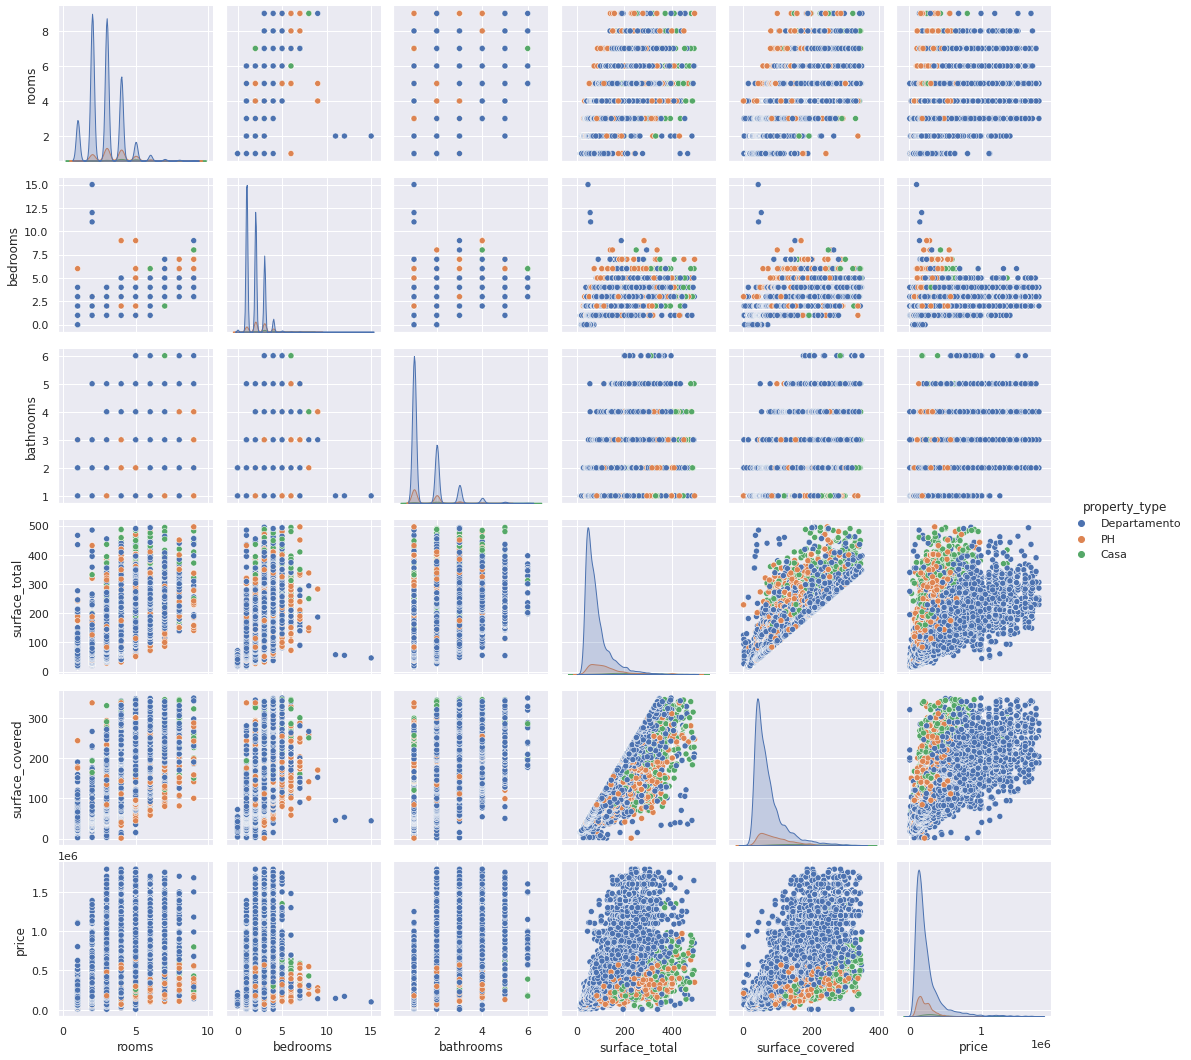

In [ ]:
sns.pairplot(df2, hue='property_type', vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'])


De los dos anteriores pairplots podemos ver que las relaciones son mas claras. al haber eliminado valores outliers, aun que por lo que vemos siguen existiendo valores muy por encima de los normales.

#Machine Learning

In [ ]:
df3 = df2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df3.shape

(78351, 6)

In [ ]:
X = df3.iloc[:,0:5]
print(X.shape)
y = df3.iloc[:,5]
y.shape
print(X.head())
print('')
y.head()

(78351, 5)
   rooms  bedrooms  bathrooms  surface_total  surface_covered
0    7.0       7.0        2.0          140.0            140.0
1    2.0       1.0        2.0           70.0             58.0
2    2.0       1.0        1.0           45.0             45.0
3    2.0       1.0        1.0           85.0             50.0
5    2.0       1.0        1.0           56.0             56.0



0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(64247, 5) (64247,) (14104, 5) (14104,)


In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=100, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=100)

tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='uniform')

##Evaluamos el mean square error para diferentes hiperparametros

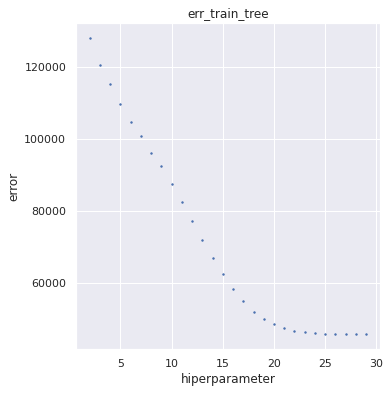

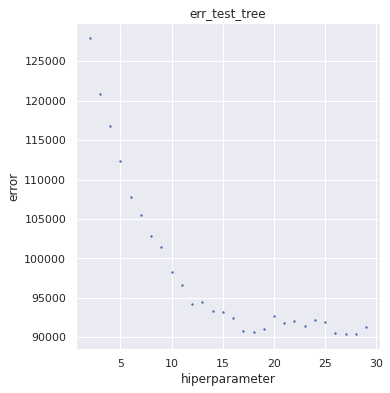

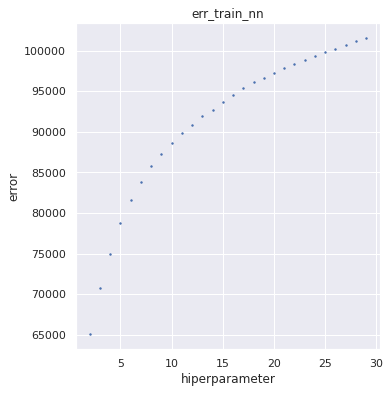

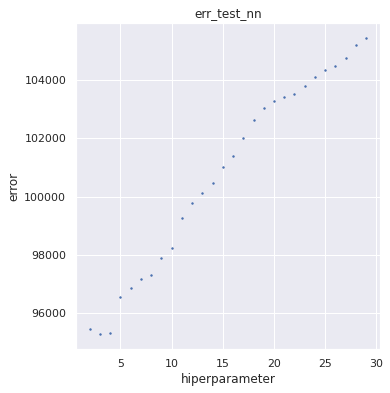

In [ ]:
err_train_tree = []
err_train_nn = []
err_test_tree = []
err_test_nn = []
idx= [range(2,30,1)]
for i in range(2,30,1):
  tree_regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
  knn_regressor = KNeighborsRegressor(n_neighbors=i,)

  tree_regressor.fit(X_train, y_train)
  knn_regressor.fit(X_train, y_train)

  y_train_pred_tree = tree_regressor.predict(X_train)
  y_test_pred_tree = tree_regressor.predict(X_test)

  y_train_pred_nn = knn_regressor.predict(X_train)
  y_test_pred_nn = knn_regressor.predict(X_test)

  rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
  rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

  rmse_train_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
  rmse_test_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))

  err_train_tree.append(rmse_train_tree)
  err_train_nn.append(rmse_train_nn)
  err_test_tree.append(rmse_test_tree)
  err_test_nn.append(rmse_test_nn)

def plot_err(err,idx,titulo):
  plt1.figure(figsize = (12,6))
  ax = plt1.subplot(1,2,2)
  ax.scatter(idx,err, s =2)
  plt1.xlabel('hiperparameter')
  plt1.ylabel('error')
  plt1.title(titulo)

  #plt1.tight_layout()
  plt1.show()

plot_err(err_train_tree,idx,'err_train_tree')
plot_err(err_test_tree,idx,'err_test_tree')
plot_err(err_train_nn,idx, 'err_train_nn')
plot_err(err_test_nn,idx,'err_test_nn')

##Mismo proceso pero ahora para el error cuadrado

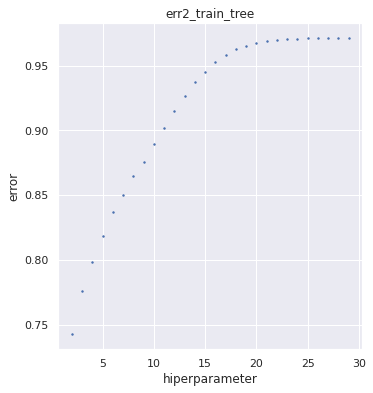

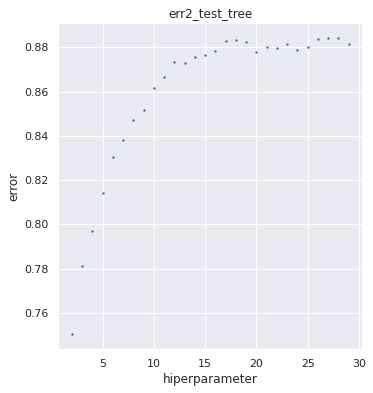

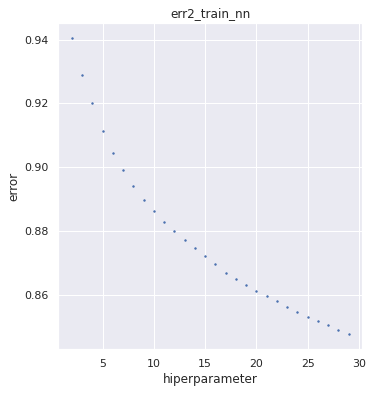

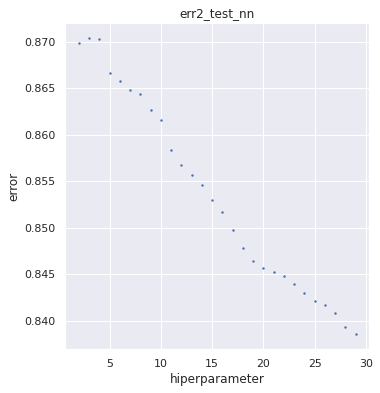

In [ ]:
r2_train_tree = []
r2_train_nn = []
r2_test_tree = []
r2_test_nn = []
idx= [range(2,30,1)]
for i in range(2,30,1):
  tree_regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
  knn_regressor = KNeighborsRegressor(n_neighbors=i,)

  tree_regressor.fit(X_train, y_train)
  knn_regressor.fit(X_train, y_train)

  y_train_pred_tree = tree_regressor.predict(X_train)
  y_test_pred_tree = tree_regressor.predict(X_test)

  y_train_pred_nn = knn_regressor.predict(X_train)
  y_test_pred_nn = knn_regressor.predict(X_test)

  rmse_train_tree = np.sqrt(r2_score(y_train, y_train_pred_tree))
  rmse_test_tree = np.sqrt(r2_score(y_test, y_test_pred_tree))

  rmse_train_nn = np.sqrt(r2_score(y_train, y_train_pred_nn))
  rmse_test_nn = np.sqrt(r2_score(y_test, y_test_pred_nn))

  r2_train_tree.append(rmse_train_tree)
  r2_train_nn.append(rmse_train_nn)
  r2_test_tree.append(rmse_test_tree)
  r2_test_nn.append(rmse_test_nn)

def plot_err(err,idx,titulo):
  plt1.figure(figsize = (12,6))
  ax = plt1.subplot(1,2,2)
  ax.scatter(idx,err, s =2)
  plt1.xlabel('hiperparameter')
  plt1.ylabel('error')
  plt1.title(titulo)

  #plt1.tight_layout()
  plt1.show()

plot_err(r2_train_tree,idx,'err2_train_tree')
plot_err(r2_test_tree,idx,'err2_test_tree')
plot_err(r2_train_nn,idx, 'err2_train_nn')
plot_err(r2_test_nn,idx,'err2_test_nn')

Del estudio anterior podemos escoger los mejores hiperparametros para cada modelo. Previniento overfitting y minimizando error. Basado en esto

Se selecciona:
Profundidad de arbol:  14
Numero de vecinos: 5

Modelo: Árbol de Decisión

Raíz del error cuadrático medio en Train: 66859.65438116576
Raíz del error cuadrático medio en Test: 93382.69164671515

Error R2 en Train: 0.8779683046931519
Errpr R2 en Test: 0.8779683046931519



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


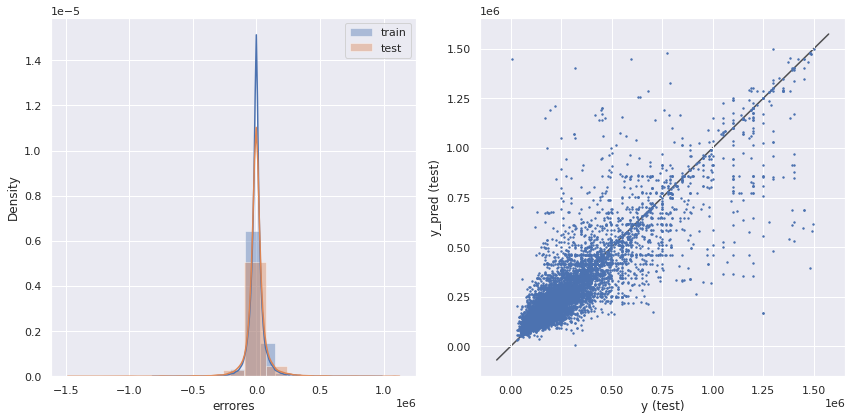

Modelo: Vecinos más cercanos

Raíz del error cuadrático medio en Train: 78792.95099517613
Raíz del error cuadrático medio en Test: 96552.83164872558

Error R2 en Train: 0.830519739605704
Errpr R2 en Test: 0.830519739605704



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


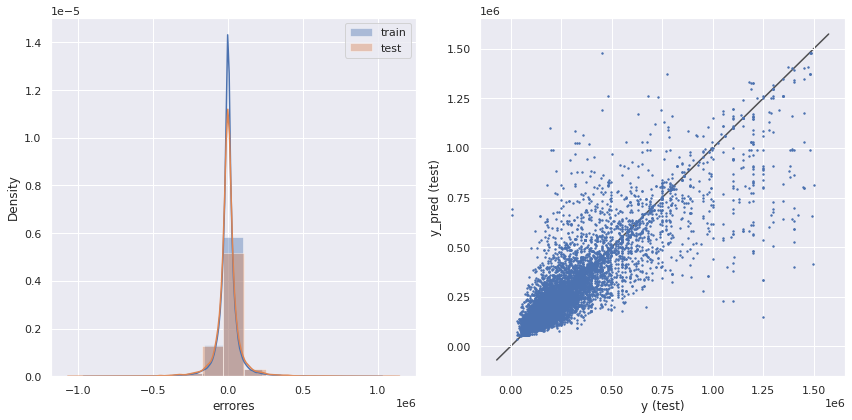

In [ ]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
tree_regressor = DecisionTreeRegressor(max_depth=14, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5,)

tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    print(f'Modelo: {modelos[i]}')
    print()
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_train, y_train_pred)

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print()

    print(f'Error R2 en Train: {r2_train}')
    print(f'Errpr R2 en Test: {r2_test}')
    print()

    plt1.figure(figsize = (12,6))

    plt1.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 15, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 15, label = 'test')
    plt1.xlabel('errores')
    plt1.legend()


    ax = plt1.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt1.xlabel('y (test)')
    plt1.ylabel('y_pred (test)')

    plt1.tight_layout()
    plt1.show()

##De los resultados finales, podemos decir que claramente en esta tarea el arbol de decisiones es superior a vecinos mas cercanos teniendo errores cuadrados mas cercanos a uno y error cuadratico medio menores por el orden de 20mil en ambos train y test set.  Al no ser tan alta la diferencia entre el error en el test y train podemos indicar que no se ha generado overfitting. sin embargo estos errores aun son considerablemente altos. Para poder reducirlo seria posible llevar acabo un mejor procesamietno de los datos. un fitrado mas especifico, limitando la poblacion de estudio. y agregando variables categoricas en forma de one-hot vectors para poder incluirlas en el analisis, asi como una normalizacion de los datos que se dan al modelo.

#Implementacion de una red neuronal para comparar desempeños

In [ ]:
import random
import os.path
from keras import Sequential
from keras.layers import Dense
from numpy import interp
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def crear_modelo():
    #check if theres a saved model of the NN
    #if os.path.isfile('spoiler_model.h5') is False:
    print('first time, no saved model,create one from scratch')
    model = Sequential()  #le cambiamos el inicializador a uno uniforme?
    model.add(Dense(8, input_dim=5, activation='relu')) #revisar si cambiamos el input directo al edo
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1)) #activation=softmax
    model.compile(loss='mse', optimizer=Adam(),metrics=["mean_squared_error"]) #loss=categorical_crossentropy  optimizer=sgd
    model.summary()
    """
    else:
        print("cargado modelo preguardado")
        model = load_model('spoiler_model.h5')
        model.summary()
        model.get_weights()
    """
    return model

In [ ]:
ann = crear_modelo()

first time, no saved model,create one from scratch
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


El entrenamiento toma unos 3-5 minutos

In [ ]:
ann.fit(X_train, y_train, epochs=50)

Epoch 1/50
2008/2008 [==============================] - 2s 985us/step - loss: 13799036928.0000 - mean_squared_error: 13799036928.0000
Epoch 2/50
2008/2008 [==============================] - 2s 1ms/step - loss: 13780796416.0000 - mean_squared_error: 13780796416.0000
Epoch 3/50
2008/2008 [==============================] - 2s 1ms/step - loss: 13750513664.0000 - mean_squared_error: 13750513664.0000
Epoch 4/50
2008/2008 [==============================] - 2s 1ms/step - loss: 13716407296.0000 - mean_squared_error: 13716407296.0000
Epoch 5/50
2008/2008 [==============================] - 2s 998us/step - loss: 13691492352.0000 - mean_squared_error: 13691492352.0000
Epoch 6/50
2008/2008 [==============================] - 2s 1ms/step - loss: 13661815808.0000 - mean_squared_error: 13661815808.0000
Epoch 7/50
2008/2008 [==============================] - 2s 1ms/step - loss: 13631164416.0000 - mean_squared_error: 13631164416.0000
Epoch 8/50
2008/2008 [==============================] - 2s 1ms/step - lo

In [ ]:
print('Train errors')
pred_train= ann.predict(X_train)
print('MSE',np.sqrt(mean_squared_error(y_train,pred_train)))
print('error r2', r2_score(y_train, pred_train))
print()

print('Test errors')
pred= ann.predict(X_test)
print('MSE',np.sqrt(mean_squared_error(y_test,pred)))
print('error r2', r2_score(y_test, pred))

Train errors
MSE 113151.51604129435
error r2 0.6504855427947887

Test errors
MSE 113959.62312776445
error r2 0.6532219111441637


De los resultados obtenidos con la red neuronal podemos concluir que aun que estas son consideradas modelos mas poderosos, son mas sensibles a la limpieza de los datos. ya que aun con los mismos datos, los errores fueron mas altos. esto nos deja claro que no siempre son la solucion adecuada.


##Este trabajo presento un analisi exploratorio para estudiar el problema de prediccion del costo de una propiedad en la region de capital federal de argentina. Se realizo un filtrado de datos, dejando de lado variables categoricas. Este es un  fuerte punto de mejora para futuros trabajos. Finalmente se logro concluir que el algoritmo de arboles de decisin es el mejor modelo para esta tarea. Comparando con variedad de hiper parametros y otros dos modelos, de vecinos mas cercanos, y una red neuronal sencilla. El rango de precios sigue teniendo alta variacion, debido a esto los errores de precios siguen siendo altos. sin embargo un limpiado y seleccionado mas profundo de las variables podria generar resultados mucho mas precisos.